In [45]:
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data=pd.read_csv(os.path.dirname(os.getcwd())+'/Python Project/result/AKI.csv')

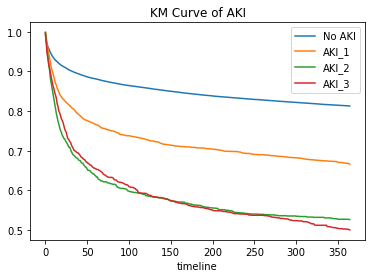

In [47]:
ax = plt.subplot(111)
kmf = KaplanMeierFitter()
group=['aki_0','aki_1', 'aki_2', 'aki_3']
legend=['No AKI','AKI_1', 'AKI_2', 'AKI_3']
for i in range(len(group)):
    kmf.fit(data[data[group[i]]==1]['365_surviving_time'], 
            event_observed=data[data[group[i]]==1]['365_mortality'], timeline=range(0,365),label=legend[i])
    kmf.survival_function_.plot(ax=ax)
    
plt.title("KM Curve of AKI")
plt.savefig('result/AKI.tif', dpi=1000)

In [50]:
data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'ethnicity', 'gender',
       'first_careunit', 'los', 'dob_h', 'dod_h', 'admittime_h', 'dischtime_h',
       'intime_h', 'outtime_h', 'hospital_mortality', '30_mortality',
       '90_mortality', '365_mortality', 'age', 'sofa', 'sirs', 'sapsii', 'rrt',
       'cardiac dysrhythmia.csv', 'CKD.csv', 'Congestive heart failure.csv',
       'diabetes 250XX.csv', 'has_surgery.csv', 'hypertension.csv',
       'liver disease.csv', 'Malignancy.csv', 'pulmonary circulation.csv',
       'use_drug.csv', 'Albumin.csv', 'bicarbonate.csv', 'Calcium.csv',
       'creatinine.csv', 'glucose.csv', 'Hematocrit.csv', 'Hemoglobin.csv',
       'INR.csv', 'lactic acid.csv', 'pH.csv', 'platelet.csv', 'PT.csv',
       'PTT.csv', 'RDW.csv', 'TBIL.csv', 'urea nitrogen.csv', 'WBC.csv', 'BMI',
       '365_surviving_time', '30_surviving_time', 'PTT.csv16.9-26.8',
       'PTT.csv26.8-31.3', 'PTT.csv31.3-39.6', 'PTT.csv39.6-150.0',
       'PT.csv9.2-13.2', 'PT.csv13.2-14.3'

In [72]:
from lifelines.datasets import load_regression_dataset
from lifelines import CoxPHFitter

regression_dataset = load_regression_dataset()

print(regression_dataset.head())
print(regression_dataset['E'].value_counts())
print((regression_dataset['E']==0).describe())

       var1      var2      var3          T  E
0  0.595170  1.143472  1.571079  14.785652  1
1  0.209325  0.184677  0.356980   7.335846  1
2  0.693919  0.071893  0.557960   5.269797  1
3  0.443804  1.364646  0.374221  11.684092  1
4  1.613324  0.125566  1.921325   7.639492  1
1    189
0     11
Name: E, dtype: int64
count       200
unique        2
top       False
freq        189
Name: E, dtype: object


In [35]:
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()

In [16]:
data['CKD.csv'].value_counts()

0.0    3522
1.0     504
Name: CKD.csv, dtype: int64